# Using TensorFlow

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
warnings.simplefilter(action='ignore', category=ImportWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=ResourceWarning)

In [2]:
import numpy as np
import tensorflow as tf

## Check Hardware Availability

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11990701777180821867
]


## CPU vs GPU

In [4]:
%%time
m = 10000
n = 10000
p = 10000

with tf.device('/cpu:0'):
    a = tf.random_normal([m, n], mean=0, stddev=1)
    b = tf.random_normal([n, p], mean=0, stddev=1)
    c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
res = sess.run(c)
print(res.shape, res.dtype)

(10000, 10000) float32
CPU times: user 58.5 s, sys: 448 ms, total: 58.9 s
Wall time: 7.5 s


In [4]:
%%time
m = 10000
n = 10000
p = 10000

with tf.device('/gpu:0'):
    a = tf.random_normal([m, n], mean=0, stddev=1)
    b = tf.random_normal([n, p], mean=0, stddev=1)
    c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
res = sess.run(c)
print(res.shape, res.dtype)

InvalidArgumentError: Cannot assign a device for operation 'random_normal_1/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_1/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_1/shape)]]

Caused by op 'random_normal_1/RandomStandardNormal', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-9b9ffc8589ff>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', "m = 10000\nn = 10000\np = 10000\n\nwith tf.device('/gpu:0'):\n    a = tf.random_normal([m, n], mean=0, stddev=1)\n    b = tf.random_normal([n, p], mean=0, stddev=1)\n    c = tf.matmul(a, b)\nsess = tf.Session(config=tf.ConfigProto(log_device_placement=True))\nres = sess.run(c)\nprint(res.shape, res.dtype)")
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2131, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-62>", line 2, in time
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1238, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 7, in <module>
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 77, in random_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 588, in random_standard_normal
    seed2=seed2, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'random_normal_1/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_1/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_1/shape)]]


## Basic computations in TensorFlow

### Starting a session

In [6]:
tf.InteractiveSession()

### Creation of tensors

In [8]:
a = tf.zeros((3,5))
a.eval()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
a.dtype, a.shape

(tf.float32, TensorShape([Dimension(3), Dimension(5)]))

In [10]:
b = tf.ones((3,5))
b.eval()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [11]:
c = tf.fill((3,5), value=23.0)
c.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

In [12]:
d = tf.eye(5)
d.eval()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
e = tf.diag(tf.range(1.0,6.0))
e.eval()

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]], dtype=float32)

### Generating random numbers

In [14]:
x = tf.random_normal((5,3))
x.eval()

array([[ 0.62824744, -0.20241013,  1.0971776 ],
       [-0.9905178 ,  1.9196227 , -0.9287045 ],
       [ 0.20328178, -0.4631293 ,  0.6188663 ],
       [-1.2227482 ,  0.286855  ,  0.15114182],
       [-1.6340742 , -0.7580584 ,  2.1878383 ]], dtype=float32)

In [15]:
y = tf.random_uniform((5,3))
y.eval()

array([[0.6225164 , 0.0806222 , 0.81447804],
       [0.7441789 , 0.38030994, 0.5147151 ],
       [0.37053728, 0.29393053, 0.491472  ],
       [0.9317776 , 0.87487483, 0.83653367],
       [0.7989179 , 0.9247011 , 0.80408144]], dtype=float32)

In [16]:
z = tf.random_poisson(5, (5,3))
z.eval()

array([[2., 4., 3.],
       [2., 3., 4.],
       [7., 4., 2.],
       [7., 4., 8.],
       [6., 5., 5.]], dtype=float32)

## Opearations and graphs

#### The object stored in a variable is not its value.

In [17]:
z

<tf.Tensor 'random_poisson/RandomPoissonV2:0' shape=(5, 3) dtype=float32>

In [18]:
z.eval()

array([[5., 2., 3.],
       [3., 2., 4.],
       [6., 4., 4.],
       [5., 5., 6.],
       [3., 2., 6.]], dtype=float32)

In [21]:
z.eval()

array([[ 4.,  2.,  7.],
       [ 7.,  5.,  3.],
       [ 2.,  4.,  2.],
       [ 4.,  6.,  4.],
       [10.,  4.,  4.]], dtype=float32)

#### Element-wise operations

In [22]:
op1 = (a + b) * c
op1.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

In [23]:
op2 = tf.multiply(tf.add(a, b), c)
op2.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

#### Matrix operations

In [24]:
op3 = tf.matmul(c, tf.transpose(c))
op3.eval()

array([[2645., 2645., 2645.],
       [2645., 2645., 2645.],
       [2645., 2645., 2645.]], dtype=float32)

In [25]:
c.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

In [26]:
tf.reshape(c, (5,-1)).eval()

array([[23., 23., 23.],
       [23., 23., 23.],
       [23., 23., 23.],
       [23., 23., 23.],
       [23., 23., 23.]], dtype=float32)

### Broadcasting

In [27]:
(c - 22).eval()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [28]:
(c + tf.ones((3, 1))).eval()

array([[24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24.]], dtype=float32)

In [29]:
(c * tf.constant(2.0, shape=(1, 5))).eval()

array([[46., 46., 46., 46., 46.],
       [46., 46., 46., 46., 46.],
       [46., 46., 46., 46., 46.]], dtype=float32)

### Explicit Casts

In [30]:
x1 = tf.eye(3)

In [31]:
x2 = tf.eye(3, dtype=tf.int32)

In [32]:
try:
    x1 + x2
except ValueError as e:
    print(e)

Tensor conversion requested dtype float32 for Tensor with dtype int32: 'Tensor("eye_2/MatrixDiag:0", shape=(3, 3), dtype=int32)'


In [33]:
x2 = tf.cast(x2, dtype=tf.float32)

In [34]:
(x1 + x2).eval()

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]], dtype=float32)

## Reductions

In [35]:
x = tf.random_normal((10,1), 0, 1)
x.eval()

array([[ 2.4737973 ],
       [-0.19042204],
       [ 0.5547171 ],
       [ 0.4972883 ],
       [-0.7309013 ],
       [-1.427839  ],
       [-1.4163692 ],
       [ 1.1321739 ],
       [ 1.0153337 ],
       [ 0.7732294 ]], dtype=float32)

#### Mean

In [36]:
tf.reduce_mean(x).eval()

0.16196997

#### Sum of squares

In [37]:
tf.reduce_sum(tf.square(x)).eval()

7.7876945

## Data Flow Graphs 

In [38]:
tf.get_default_graph()

Run if necessary
```bash
! pip install graphviz
```

Source for graph drawing code: [Visualizing TensorFlow Graphs in Jupyter Notebooks](https://blog.jakuba.net/2017/05/30/tensorflow-visualization.html)

In [41]:
from graphviz import Digraph

In [42]:
def tf_to_dot(graph):
    dot = Digraph()

    for n in g.as_graph_def().node:
        dot.node(n.name, label=n.name)

        for i in n.input:
            dot.edge(i, n.name)
            
    return dot

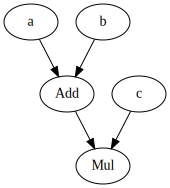

In [43]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    ans = tf.multiply(tf.add(a, b), c)
    
tf_to_dot(g)

## Constants, Variables and Placeholders

$$
constants\\
variables \leftarrow parameters\\
placeholders \leftarrow data\\
$$

### Constants

Not much to explain here. Use constants to store invariant values, for example - fixed hyperparameters.

In [44]:
a = tf.constant(3.0)
a.eval()

3.0

In [45]:
b = tf.ones(3)
b.eval()

array([1., 1., 1.], dtype=float32)

### Variables

In [46]:
c = tf.Variable(tf.ones(3))

In [47]:
try:
    c.eval()
except tf.errors.FailedPreconditionError as e:
    print(e)

Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]


In [48]:
with tf.Session() as s1:
    s1.run(tf.global_variables_initializer())
    print(s1.run(c))

InvalidArgumentError: Cannot assign a device for operation 'random_normal_5/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_5/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_5/shape)]]

Caused by op 'random_normal_5/RandomStandardNormal', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-9b9ffc8589ff>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', "m = 10000\nn = 10000\np = 10000\n\nwith tf.device('/gpu:0'):\n    a = tf.random_normal([m, n], mean=0, stddev=1)\n    b = tf.random_normal([n, p], mean=0, stddev=1)\n    c = tf.matmul(a, b)\nsess = tf.Session(config=tf.ConfigProto(log_device_placement=True))\nres = sess.run(c)\nprint(res.shape, res.dtype)")
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2131, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-62>", line 2, in time
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1238, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 7, in <module>
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 77, in random_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 588, in random_standard_normal
    seed2=seed2, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'random_normal_5/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_5/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_5/shape)]]


In [49]:
with tf.Session() as s1:
    s1.run(c.assign(5*b))
    print(s1.run(c))

InvalidArgumentError: Cannot assign a device for operation 'random_normal_5/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_5/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_5/shape)]]

Caused by op 'random_normal_5/RandomStandardNormal', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-9b9ffc8589ff>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', "m = 10000\nn = 10000\np = 10000\n\nwith tf.device('/gpu:0'):\n    a = tf.random_normal([m, n], mean=0, stddev=1)\n    b = tf.random_normal([n, p], mean=0, stddev=1)\n    c = tf.matmul(a, b)\nsess = tf.Session(config=tf.ConfigProto(log_device_placement=True))\nres = sess.run(c)\nprint(res.shape, res.dtype)")
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2131, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-62>", line 2, in time
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1238, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 7, in <module>
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 77, in random_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 588, in random_standard_normal
    seed2=seed2, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'random_normal_5/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_5/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_5/shape)]]


Variables are updated on each pass of the data flow graph. They are used to store parameters that must be updated, for example, weights and biases of a network.

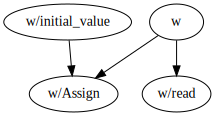

In [50]:
g = tf.Graph()

with g.as_default():
    w = tf.Variable(0, name='w')
    
tf_to_dot(g)

### Placeholders

Placeholders are used to feed in data when the data flow graph is run.

In [51]:
x = tf.placeholder(tf.float32, shape=(3,3))
y = tf.matmul(x, x)

data = np.random.rand(3, 3)

with tf.Session() as s1:
    print(s1.run(y, feed_dict={x: data})) 

InvalidArgumentError: Cannot assign a device for operation 'random_normal_5/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_5/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_5/shape)]]

Caused by op 'random_normal_5/RandomStandardNormal', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-9b9ffc8589ff>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', "m = 10000\nn = 10000\np = 10000\n\nwith tf.device('/gpu:0'):\n    a = tf.random_normal([m, n], mean=0, stddev=1)\n    b = tf.random_normal([n, p], mean=0, stddev=1)\n    c = tf.matmul(a, b)\nsess = tf.Session(config=tf.ConfigProto(log_device_placement=True))\nres = sess.run(c)\nprint(res.shape, res.dtype)")
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2131, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-62>", line 2, in time
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1238, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 7, in <module>
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 77, in random_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 588, in random_standard_normal
    seed2=seed2, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'random_normal_5/RandomStandardNormal': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_normal_5/RandomStandardNormal = RandomStandardNormal[T=DT_INT32, dtype=DT_FLOAT, seed=0, seed2=0, _device="/device:GPU:0"](random_normal_5/shape)]]
